# Exercise: Convert to TF-TRT Float16

In this notebook you'll update the `convert_to_trt_graph_and_save` function you worked with in the last notebook to be able to also perform conversion for Float16 precision.

## Objectives

By the time you complete this notebook you will be able to:

- Optimize a saved model with TF-TRT

## Imports

In [1]:
from tensorflow.python.compiler.tensorrt import trt_convert as trt

In [2]:
from lab_helpers import (
    get_images, batch_input, load_tf_saved_model,
    predict_and_benchmark_throughput_from_saved, display_prediction_info
)

## Create Batched Input

Run these cells to create batched input. You don't need to modify the cells.

In [3]:
number_of_images = 32
images = get_images(number_of_images)

In [4]:
batched_input = batch_input(images)

## Make Conversion

Address the `TODO` and make this function capable of performing conversion for Float16 precision.

In [5]:
def convert_to_trt_graph_and_save(precision_mode='float32', input_saved_model_dir='resnet_v2_152_saved_model'):
    
    if precision_mode == 'float32':
        precision_mode = trt.TrtPrecisionMode.FP32
        converted_save_suffix = '_TFTRT_FP32'
        
    if precision_mode == 'float16':
        # TODO: Correctly set precision_mode
        precision_mode = trt.TrtPrecisionMode.FP16
        converted_save_suffix = '_TFTRT_FP16'
        
    output_saved_model_dir = input_saved_model_dir + converted_save_suffix
    
    conversion_params = trt.DEFAULT_TRT_CONVERSION_PARAMS._replace(
        precision_mode=precision_mode, 
        max_workspace_size_bytes=8000000000
    )

    converter = trt.TrtGraphConverterV2(
        input_saved_model_dir=input_saved_model_dir,
        conversion_params=conversion_params
    )

    print('Converting {} to TF-TRT graph precision mode {}...'.format(input_saved_model_dir, precision_mode))

    converter.convert()

    print('Saving converted model to {}...'.format(output_saved_model_dir))
    converter.save(output_saved_model_dir=output_saved_model_dir)
    print('Complete')

In [6]:
convert_to_trt_graph_and_save(precision_mode='float16', input_saved_model_dir='resnet_v2_152_saved_model')

INFO:tensorflow:Linked TensorRT version: (7, 0, 0)
INFO:tensorflow:Loaded TensorRT version: (7, 0, 0)
Converting resnet_v2_152_saved_model to TF-TRT graph precision mode FP16...
Saving converted model to resnet_v2_152_saved_model_TFTRT_FP16...
INFO:tensorflow:Could not find TRTEngineOp_0 in TF-TRT cache. This can happen if build() is not called, which means TensorRT engines will be built and cached at runtime.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: resnet_v2_152_saved_model_TFTRT_FP16/assets
Complete


### Solution

Expand the next cell to see the solution if you get stuck.

```python
def convert_to_trt_graph_and_save(precision_mode='float32', input_saved_model_dir='resnet_v2_152_saved_model'):
    
    if precision_mode == 'float32':
        precision_mode = trt.TrtPrecisionMode.FP32
        converted_save_suffix = '_TFTRT_FP32'
        
    if precision_mode == 'float16':
        # TODO: Correctly set precision_mode`
        precision_mode = trt.TrtPrecisionMode.FP16
        converted_save_suffix = '_TFTRT_FP16'
        
    output_saved_model_dir = input_saved_model_dir + converted_save_suffix
    
    conversion_params = trt.DEFAULT_TRT_CONVERSION_PARAMS._replace(
        precision_mode=precision_mode, 
        max_workspace_size_bytes=8000000000
    )

    converter = trt.TrtGraphConverterV2(
        input_saved_model_dir=input_saved_model_dir,
        conversion_params=conversion_params
    )

    print('Converting {} to TF-TRT graph precision mode {}...'.format(input_saved_model_dir, precision_mode))

    converter.convert()

    print('Saving converted model to {}...'.format(output_saved_model_dir))
    converter.save(output_saved_model_dir=output_saved_model_dir)
    print('Complete')
```

## Benchmark TF-TRT Float16

Load the optimized TF model.

In [7]:
infer = load_tf_saved_model('resnet_v2_152_saved_model_TFTRT_FP16')

Loading saved model resnet_v2_152_saved_model_TFTRT_FP16...


Perform inference with the optimized graph, and after a warmup, time and calculate throughput.

In [8]:
all_preds = predict_and_benchmark_throughput_from_saved(batched_input, infer, N_warmup_run=50, N_run=150)

Steps 0-50 average: 18.8ms
Steps 50-100 average: 18.8ms
Steps 100-150 average: 18.8ms
Throughput: 1704 images/s


Run this cell to view predictions, which you can use for comparison.

./data/coco/CS/nuremberg_000000_000453_leftImg8bit.png
[('n06874185', 'traffic_light', 0.3734159), ('n06794110', 'street_sign', 0.1507031)]


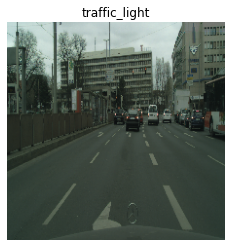

./data/coco/CS/nuremberg_000000_000454_leftImg8bit.png
[('n04487081', 'trolleybus', 0.86635286), ('n04335435', 'streetcar', 0.053030573)]


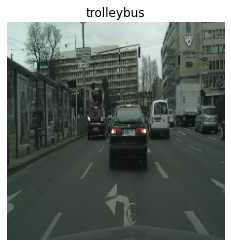

./data/coco/CS/nuremberg_000000_000455_leftImg8bit.png
[('n03770679', 'minivan', 0.2960702), ('n03977966', 'police_van', 0.24612258)]


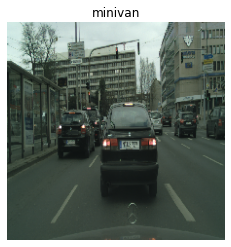

./data/coco/CS/nuremberg_000000_000456_leftImg8bit.png
[('n03977966', 'police_van', 0.4797262), ('n03417042', 'garbage_truck', 0.20195828)]


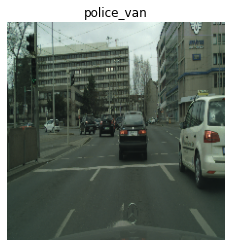

./data/coco/CS/nuremberg_000000_000457_leftImg8bit.png
[('n06874185', 'traffic_light', 0.31943125), ('n02930766', 'cab', 0.16452464)]


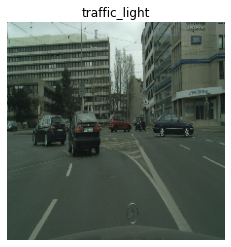

./data/coco/CS/nuremberg_000000_000458_leftImg8bit.png
[('n06874185', 'traffic_light', 0.35873273), ('n04335435', 'streetcar', 0.17849752)]


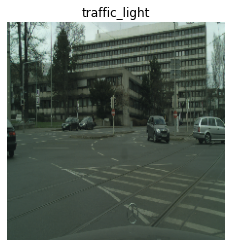

./data/coco/CS/nuremberg_000000_000459_leftImg8bit.png
[('n06874185', 'traffic_light', 0.08459844), ('n02965783', 'car_mirror', 0.051547192)]


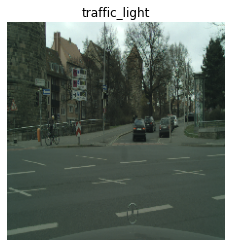

./data/coco/CS/nuremberg_000000_000460_leftImg8bit.png
[('n03220513', 'dome', 0.5494841), ('n03788195', 'mosque', 0.22696957)]


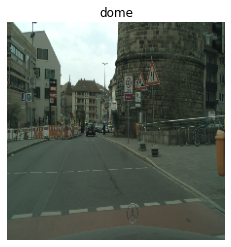

./data/coco/CS/nuremberg_000000_000461_leftImg8bit.png
[('n06874185', 'traffic_light', 0.21048523), ('n06794110', 'street_sign', 0.18124442)]


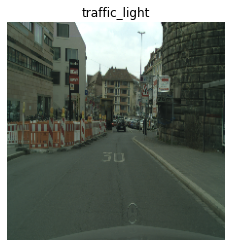

./data/coco/CS/nuremberg_000000_000462_leftImg8bit.png
[('n04335435', 'streetcar', 0.35433245), ('n06874185', 'traffic_light', 0.27669775)]


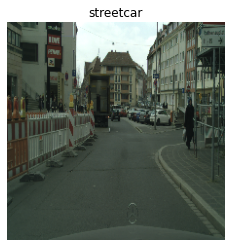

./data/coco/CS/nuremberg_000000_000463_leftImg8bit.png
[('n06874185', 'traffic_light', 0.52765423), ('n03891332', 'parking_meter', 0.14279139)]


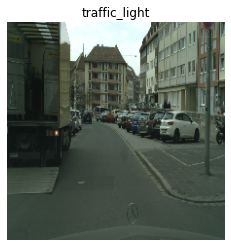

./data/coco/CS/nuremberg_000000_000464_leftImg8bit.png
[('n06794110', 'street_sign', 0.22263186), ('n03891332', 'parking_meter', 0.18724288)]


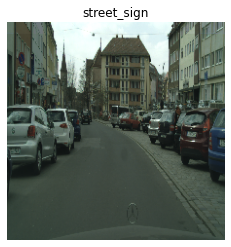

./data/coco/CS/nuremberg_000000_000465_leftImg8bit.png
[('n02930766', 'cab', 0.14749101), ('n03417042', 'garbage_truck', 0.12399572)]


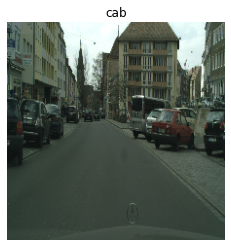

./data/coco/CS/nuremberg_000000_000466_leftImg8bit.png
[('n06874185', 'traffic_light', 0.611621), ('n06794110', 'street_sign', 0.120299175)]


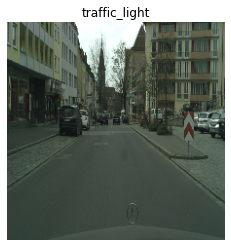

./data/coco/CS/nuremberg_000000_000467_leftImg8bit.png
[('n04486054', 'triumphal_arch', 0.8047979), ('n04335435', 'streetcar', 0.030115679)]


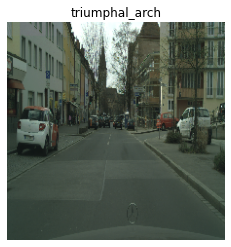

./data/coco/CS/nuremberg_000000_000468_leftImg8bit.png
[('n06794110', 'street_sign', 0.37565985), ('n02930766', 'cab', 0.21441124)]


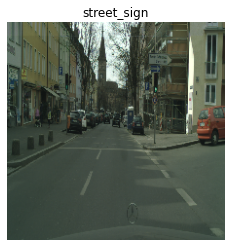

./data/coco/CS/nuremberg_000000_000469_leftImg8bit.png
[('n04335435', 'streetcar', 0.49981767), ('n04487081', 'trolleybus', 0.42938524)]


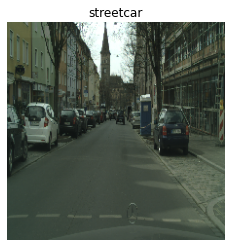

./data/coco/CS/nuremberg_000000_000470_leftImg8bit.png
[('n04335435', 'streetcar', 0.82694924), ('n04487081', 'trolleybus', 0.09689877)]


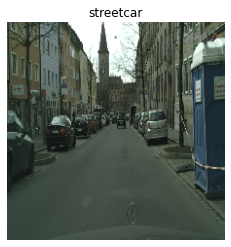

./data/coco/CS/nuremberg_000000_000471_leftImg8bit.png
[('n06794110', 'street_sign', 0.31715798), ('n06874185', 'traffic_light', 0.13763338)]


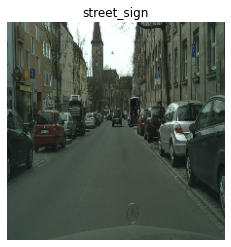

./data/coco/CS/nuremberg_000000_000472_leftImg8bit.png
[('n04335435', 'streetcar', 0.25002518), ('n02930766', 'cab', 0.2079573)]


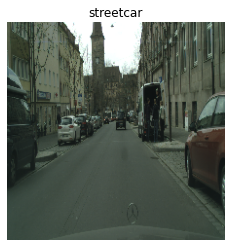

./data/coco/CS/nuremberg_000000_000473_leftImg8bit.png
[('n03891332', 'parking_meter', 0.13388947), ('n04335435', 'streetcar', 0.09754232)]


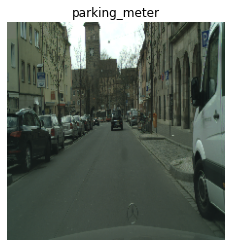

./data/coco/CS/nuremberg_000000_000474_leftImg8bit.png
[('n04509417', 'unicycle', 0.5808597), ('n03785016', 'moped', 0.059049517)]


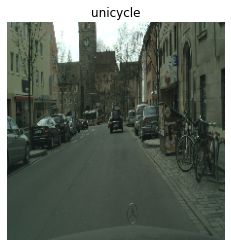

./data/coco/CS/nuremberg_000000_000475_leftImg8bit.png
[('n06874185', 'traffic_light', 0.20169528), ('n02930766', 'cab', 0.16471452)]


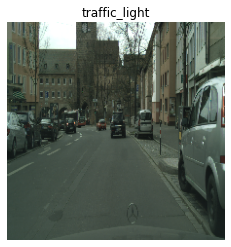

./data/coco/CS/nuremberg_000000_000476_leftImg8bit.png
[('n06874185', 'traffic_light', 0.20092914), ('n06794110', 'street_sign', 0.110838175)]


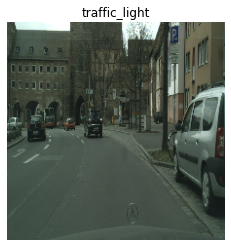

./data/coco/CS/nuremberg_000000_000477_leftImg8bit.png
[('n06874185', 'traffic_light', 0.44250125), ('n06794110', 'street_sign', 0.18715501)]


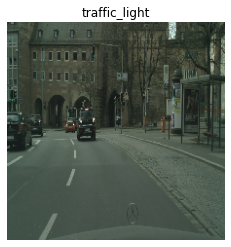

./data/coco/CS/nuremberg_000000_000478_leftImg8bit.png
[('n02687172', 'aircraft_carrier', 0.32264432), ('n06874185', 'traffic_light', 0.22872166)]


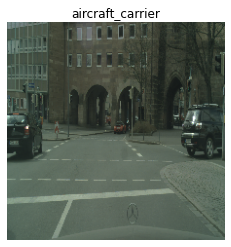

./data/coco/CS/nuremberg_000000_000479_leftImg8bit.png
[('n04005630', 'prison', 0.573354), ('n03976657', 'pole', 0.14125237)]


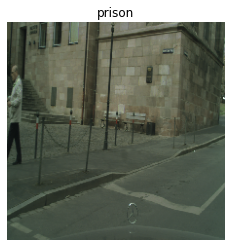

./data/coco/CS/nuremberg_000000_000480_leftImg8bit.png
[('n02930766', 'cab', 0.63167477), ('n06794110', 'street_sign', 0.068842314)]


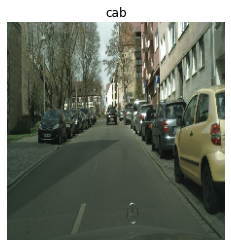

./data/coco/CS/nuremberg_000000_000481_leftImg8bit.png
[('n06874185', 'traffic_light', 0.12994243), ('n03891332', 'parking_meter', 0.11175238)]


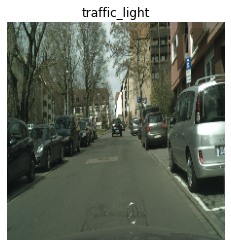

./data/coco/CS/nuremberg_000000_000482_leftImg8bit.png
[('n06874185', 'traffic_light', 0.6816938), ('n06794110', 'street_sign', 0.1085827)]


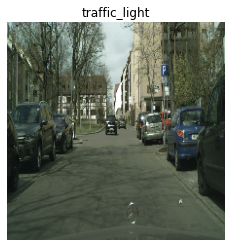

./data/coco/CS/nuremberg_000000_000483_leftImg8bit.png
[('n03417042', 'garbage_truck', 0.60291797), ('n03345487', 'fire_engine', 0.09598664)]


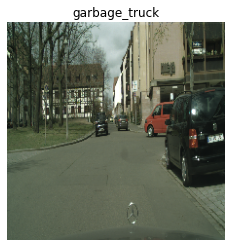

./data/coco/CS/nuremberg_000000_000484_leftImg8bit.png
[('n09229709', 'bubble', 0.47308746), ('n03345487', 'fire_engine', 0.098330624)]


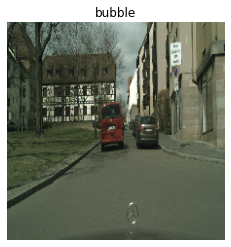

In [9]:
last_run_preds = all_preds[0]
display_prediction_info(last_run_preds, images)

## Restart Kernel

Please execute the cell below to restart the kernel and clear GPU memory.

In [10]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

## Next

Next you'll learn about the additional steps required to optimize TF-TRT models with Int8 precision.